In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=69)
X.shape, y.shape

((1000, 10), (1000,))

In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=69)

In [104]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [105]:
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1])

In [106]:
logistic.predict_proba(X_test)

array([[9.60809663e-01, 3.91903367e-02],
       [2.56805865e-01, 7.43194135e-01],
       [6.96267524e-02, 9.30373248e-01],
       [3.68652781e-02, 9.63134722e-01],
       [5.68204122e-01, 4.31795878e-01],
       [9.76479752e-01, 2.35202480e-02],
       [5.35052816e-02, 9.46494718e-01],
       [9.32784700e-01, 6.72153001e-02],
       [9.53421679e-01, 4.65783212e-02],
       [7.86917392e-02, 9.21308261e-01],
       [2.12206417e-02, 9.78779358e-01],
       [9.63153432e-01, 3.68465680e-02],
       [3.13444977e-03, 9.96865550e-01],
       [7.14634539e-01, 2.85365461e-01],
       [1.62361846e-02, 9.83763815e-01],
       [9.99473922e-01, 5.26078058e-04],
       [2.18283256e-02, 9.78171674e-01],
       [3.12756116e-01, 6.87243884e-01],
       [1.39280058e-01, 8.60719942e-01],
       [3.95112003e-01, 6.04887997e-01],
       [9.93775248e-01, 6.22475184e-03],
       [9.72377864e-01, 2.76221358e-02],
       [8.68249695e-01, 1.31750305e-01],
       [6.44194611e-02, 9.35580539e-01],
       [8.006391

# Performance Metrics

In [107]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
score = accuracy_score(y_test, y_pred)
print('Accuracy : ', score)
cm = confusion_matrix(y_test, y_pred)
print('--Confusion Matrix--\n', cm)
print('--Classification Report--\n', classification_report(y_test, y_pred))

Accuracy :  0.87
--Confusion Matrix--
 [[141  26]
 [ 13 120]]
--Classification Report--
               precision    recall  f1-score   support

           0       0.92      0.84      0.88       167
           1       0.82      0.90      0.86       133

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



# Hyperparameter tuning and Cross validation

In [108]:
model = LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1, 0.1, 0.01] # inversely proportional to lambda
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
params = dict(penalty=penalty, C=c_values, solver=solver)

# GridSearchCV

In [109]:

from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()

In [110]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=cv, n_jobs=-1)
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [111]:
import warnings
warnings.filterwarnings("ignore")

grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [112]:
grid.best_params_

{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}

In [113]:
grid.best_score_

np.float64(0.9014285714285715)

In [114]:
y_pred = grid.predict(X_test)

score = accuracy_score(y_test, y_pred)
print('Accuracy : ', score)
print('--Confusion matrix--\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy :  0.8933333333333333
--Confusion matrix--
 [[148  19]
 [ 13 120]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       167
           1       0.86      0.90      0.88       133

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



# RandomizedSearchCV

In [115]:
from sklearn.model_selection import RandomizedSearchCV
randomcv = RandomizedSearchCV(estimator=model, param_distributions=params, cv=5, scoring='accuracy', random_state=69, n_jobs=-1)

In [116]:
randomcv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [100, 10, 1, 0.1, 0.01],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   random_state=69, scoring='accuracy')

In [117]:
randomcv.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.01}

In [118]:
randomcv.best_score_

np.float64(0.9014285714285715)

In [119]:
y_pred = randomcv.predict(X_test)

print('Accuracy : ', accuracy_score(y_test, y_pred))
print('--Confusion Matrix--\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy :  0.8766666666666667
--Confusion Matrix--
 [[143  24]
 [ 13 120]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       167
           1       0.83      0.90      0.87       133

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



# Logistic Regression for Multiclass Classification

In [120]:
# create dataset
X,y = make_classification(n_samples=1000, n_features=10, n_informative=3, n_classes=3, random_state=69)

In [121]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=35)

In [122]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
y_pred

array([1, 0, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 1, 0, 0, 2, 0, 1, 0, 0, 1, 0,
       0, 2, 1, 2, 1, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 2, 0, 2, 2, 0,
       2, 0, 2, 2, 0, 0, 2, 2, 1, 1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 1, 2, 0,
       1, 2, 0, 1, 1, 1, 1, 0, 2, 2, 2, 2, 1, 2, 0, 1, 1, 0, 2, 1, 0, 0,
       2, 1, 0, 1, 1, 0, 0, 0, 1, 1, 2, 0, 2, 2, 2, 1, 2, 1, 1, 1, 0, 1,
       0, 1, 2, 0, 0, 0, 2, 1, 2, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 1,
       0, 1, 2, 1, 0, 0, 2, 2, 1, 2, 1, 0, 1, 2, 1, 1, 0, 1, 0, 2, 2, 0,
       0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 1, 1, 0, 0, 0, 2, 0,
       1, 0, 1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1,
       2, 0, 1, 0, 1, 1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 1,
       2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 1, 1, 1, 0, 2, 0, 1, 2, 0,
       2, 0, 2, 0, 1, 0, 1, 0, 2, 1, 1, 0, 1, 0, 1, 2, 0, 1, 1, 1, 2, 0,
       1, 2, 0, 1, 2, 2, 2, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1,
       0, 2, 1, 2, 2, 0, 1, 1, 1, 2, 0, 1, 2, 2])

In [123]:
print('Accuracy : ', accuracy_score(y_test, y_pred))
print('--Confusion Matrix--\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy :  0.7666666666666667
--Confusion Matrix--
 [[88 12 14]
 [ 2 79 11]
 [15 16 63]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       114
           1       0.74      0.86      0.79        92
           2       0.72      0.67      0.69        94

    accuracy                           0.77       300
   macro avg       0.76      0.77      0.76       300
weighted avg       0.77      0.77      0.77       300



# Logistic Regression for Imbalanced Dataset

In [124]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=10000, n_features=2, n_clusters_per_class=1, n_redundant=0, weights=[0.95], random_state=78)

In [125]:
X

array([[-1.34483628, -1.1510032 ],
       [-1.20066327, -1.11147814],
       [-0.09315689,  0.06484866],
       ...,
       [-1.36735429, -0.57446571],
       [ 0.18988996, -0.1346268 ],
       [ 0.3355995 ,  0.42305294]], shape=(10000, 2))

In [126]:
from collections import Counter
Counter(y)

Counter({np.int64(0): 9459, np.int64(1): 541})

<Axes: xlabel='0', ylabel='1'>

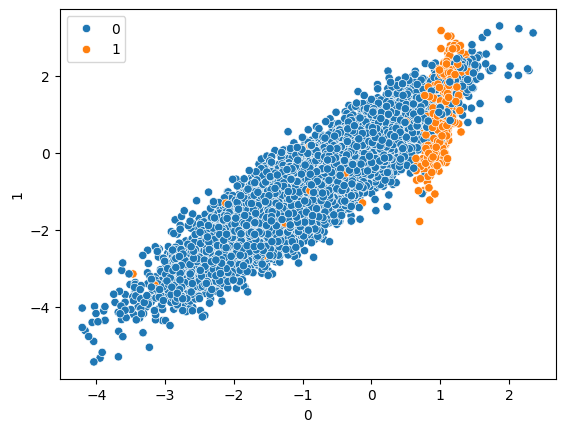

In [127]:
import seaborn as sns
import pandas as pd
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [128]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=34)

In [129]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

weights = [1, 10, 50, 100]
class_weight = [{0:i , 1:j} for i in weights for j in weights]

penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 10, 1, 0.1, 0.01]
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

params = dict(penalty=penalty, C=c_values, solver=solver, class_weight= class_weight)

In [130]:
params

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [100, 10, 1, 0.1, 0.01],
 'solver': ['lbfgs',
  'liblinear',
  'newton-cg',
  'newton-cholesky',
  'sag',
  'saga'],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [131]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=cv, n_jobs=-1)
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [132]:
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [133]:
grid.best_params_

{'C': 0.01, 'class_weight': {0: 50, 1: 100}, 'penalty': 'l2', 'solver': 'sag'}

In [134]:
grid.best_score_

np.float64(0.9721428571428572)

In [135]:
y_pred = grid.predict(X_test)

In [136]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Accuracy : ', accuracy_score(y_test, y_pred))
print('--Confusion Matrix--\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy :  0.9683333333333334
--Confusion Matrix--
 [[2768   72]
 [  23  137]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2840
           1       0.66      0.86      0.74       160

    accuracy                           0.97      3000
   macro avg       0.82      0.92      0.86      3000
weighted avg       0.97      0.97      0.97      3000

